Для тестов используем датасет Ирис

In [19]:
from sklearn import svm,datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)


Импортируем нужные метрики и построим график AUC-ROC с помощью sklearn

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [35]:
fpr,tpr,thr=roc_curve(y_test, y_score[:,1])

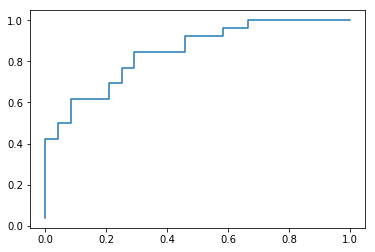

In [144]:
plt.plot(fpr,tpr);

Теперь посчитаем AUC-ROC вручную и сверим графики

In [41]:
z=np.linspace(0,1,num=100)
tpr1=[]
fpr1=[]
for x in z:
    tp=0
    fp=0
    for i in range(len(y_test)):
        if y_score[:,1][i]>=x:
            if y_test[i]==1:
                tp+=1
            if y_test[i]==0:
                fp+=1
    tpr1.append(tp/(y_test==1).sum())
    fpr1.append(fp/(y_test==0).sum())


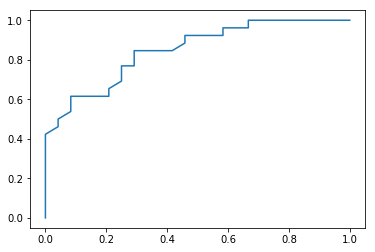

In [43]:
plt.plot(fpr1,tpr1);

Посчитаем площадь под кривой

In [44]:
auc=0
tpr2=sorted(tpr1)
fpr2=sorted(fpr1)
for x in range(len(tpr1)-1):
    auc+=(((tpr2[x]+tpr2[x+1])/2)*(fpr2[x+1]-fpr2[x]))
    


In [45]:
auc

0.84775641025641024

In [46]:
roc_auc_score(y_test,y_score[:,1])

0.84615384615384615

Построим график ROC-PR использая sklearn

In [50]:
pr, re, thr=precision_recall_curve(y_test,y_score[:,1])

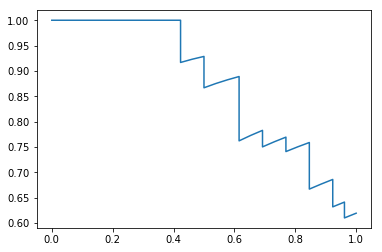

In [52]:
plt.plot(re,pr);

Посчитаем ROC-PR вручную

In [89]:
z=np.linspace(0,1,num=100)
re1=[]
pr1=[]
for x in z:
    a1=[]
    for i in range(len(y_test)):
        if y_score[:,1][i]>=x:
            
            a1.append(1)
        else:
            a1.append(0)
    #re1.append(recall_score(y_test, a1))
    #pr1.append(precision_score(y_test,a1))
    #re1.append(recall_score(y_test, a1))
    #pr1.append(precision_score(y_test,a1))

C:\Users\mrasskazov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


График вышел похожий, а вот площадь почему-то не очень сошлась

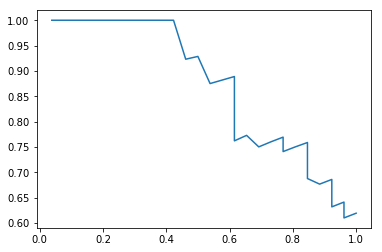

In [147]:
re1=list(filter(lambda a: a!=0,re1))
pr1=list(filter(lambda a: a!=0,pr1))
plt.plot(re1[28::], pr1[28::]);

In [148]:
auc1=0
pr2=sorted(pr1[28::])
re2=sorted(re1[28::])
for x in range(len(pr1[28::])-1):
    auc1+=(((pr2[x]+pr2[x+1])/2)*(re2[x+1]-re2[x]))

In [149]:
auc1

0.74368105262603479

In [150]:
average_precision_score(y_test, y_score[:,1])

0.87109507722678459